In [24]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, TensorBoard
from keras.layers import Input, Dropout, Dense, GlobalAveragePooling2D
from keras.models import Sequential, Model
from keras.applications.resnet import ResNet50
from keras.applications import VGG16, DenseNet121, InceptionV3, VGG19, Xception, EfficientNetB0
from tensorboard import notebook
from tensorflow import keras
import numpy as np
import sys
sys.path.append("/root/autodl-tmp/training_tool/")
from training_tool import load_data, draw_curve, draw_matrix, TimeHistory

100%|██████████| 186/186 [00:00<00:00, 192.65it/s]


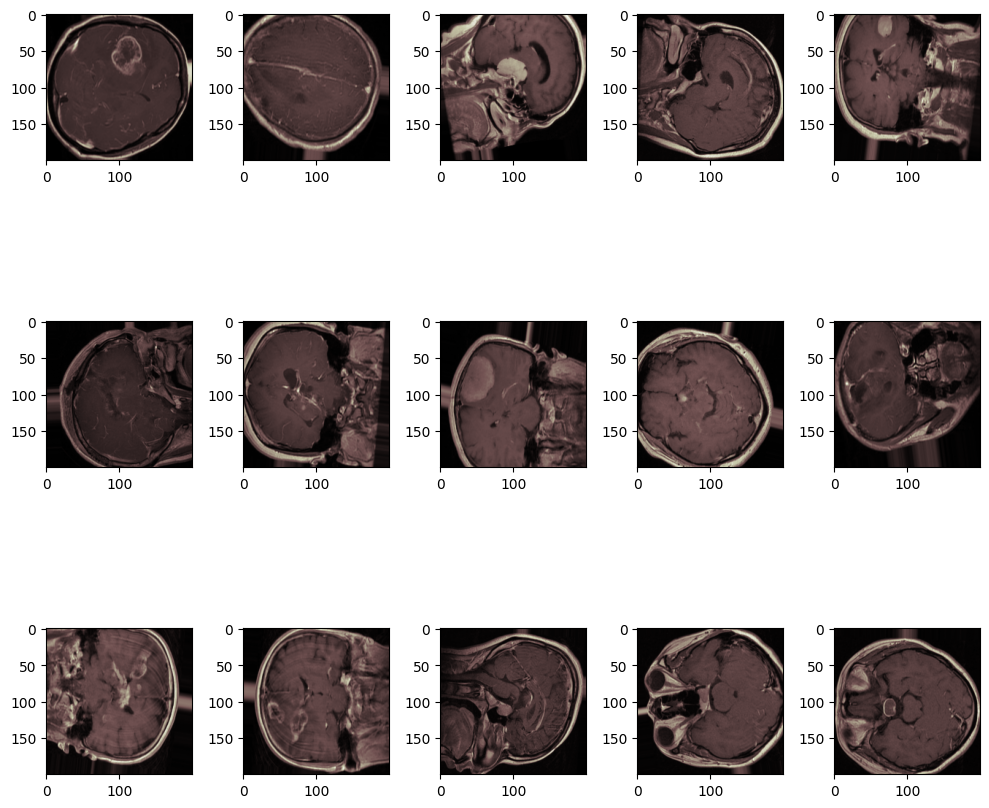

(614, 200, 200, 3)
(10536, 200, 200, 3)
(614, 3)
(10536, 3)


In [11]:
labels = ['glioma', 'meningioma', 'pituitary']
data_path = '/root/autodl-tmp/dataset/figshare_MBTD/augmented'
image_size = 200
x_train, x_test, y_train, y_test = load_data(data_path, labels, image_size)

In [12]:
net = EfficientNetB0(weights=None, include_top=False, input_shape=(image_size, image_size, 3), classes=3)

model = net.output
model = GlobalAveragePooling2D()(model)
model = Dropout(0.5)(model)
model = Dense(3, activation="softmax")(model)
model = Model(inputs=net.input, outputs=model)

adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 200, 200, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 200, 200, 3)  7          ['rescaling_1[0][0]']            
 )                                                                                                
                                                                                            

In [13]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint(filepath='model-EfficientNetB0.h5',
                             monitor='val_accuracy', verbose=1, save_best_only=False, mode='max')
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)
time_callback = TimeHistory()
history = model.fit(x_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=36,
                   callbacks=[tensorboard,checkpoint,reduce_lr, time_callback])

Epoch 1/50
263/264 [============================>.] - ETA: 0s - loss: 0.8515 - accuracy: 0.6422
Epoch 1: saving model to model-EfficientNetB0.h5
Epoch 1: 29.70 seconds
264/264 [==============================] - 30s 92ms/step - loss: 0.8515 - accuracy: 0.6424 - val_loss: 6.2665 - val_accuracy: 0.3321 - lr: 0.0010
Epoch 2/50
263/264 [============================>.] - ETA: 0s - loss: 0.4684 - accuracy: 0.8169
Epoch 2: saving model to model-EfficientNetB0.h5
Epoch 2: 22.76 seconds
264/264 [==============================] - 23s 86ms/step - loss: 0.4682 - accuracy: 0.8169 - val_loss: 7.8207 - val_accuracy: 0.3321 - lr: 0.0010
Epoch 3/50
263/264 [============================>.] - ETA: 0s - loss: 0.3105 - accuracy: 0.8834
Epoch 3: saving model to model-EfficientNetB0.h5
Epoch 3: 22.60 seconds
264/264 [==============================] - 23s 86ms/step - loss: 0.3104 - accuracy: 0.8834 - val_loss: 0.7680 - val_accuracy: 0.6812 - lr: 0.0010
Epoch 4/50
263/264 [============================>.] - ETA:

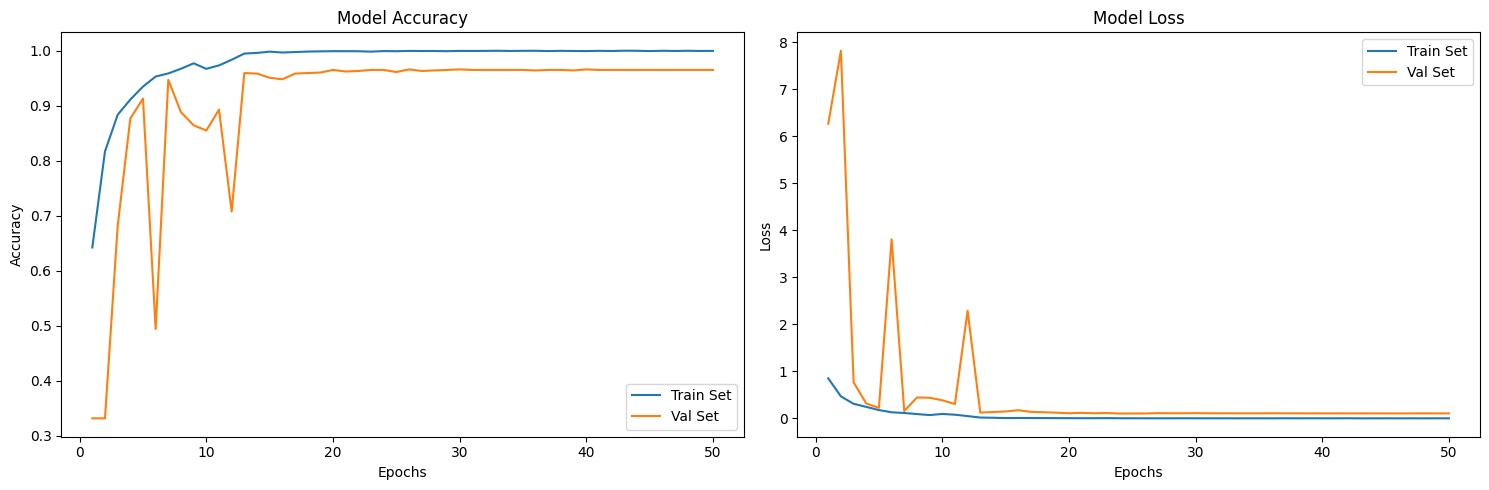

In [14]:
draw_curve(history)

20/20 [==============================] - 0s 13ms/step - loss: 0.1792 - accuracy: 0.9495
Test Accuracy:  94.95
              precision    recall  f1-score   support

      glioma     0.9713    0.9476    0.9593       286
  meningioma     0.9161    0.9225    0.9193       142
   pituitary     0.9427    0.9731    0.9577       186

    accuracy                         0.9495       614
   macro avg     0.9434    0.9477    0.9454       614
weighted avg     0.9499    0.9495    0.9496       614



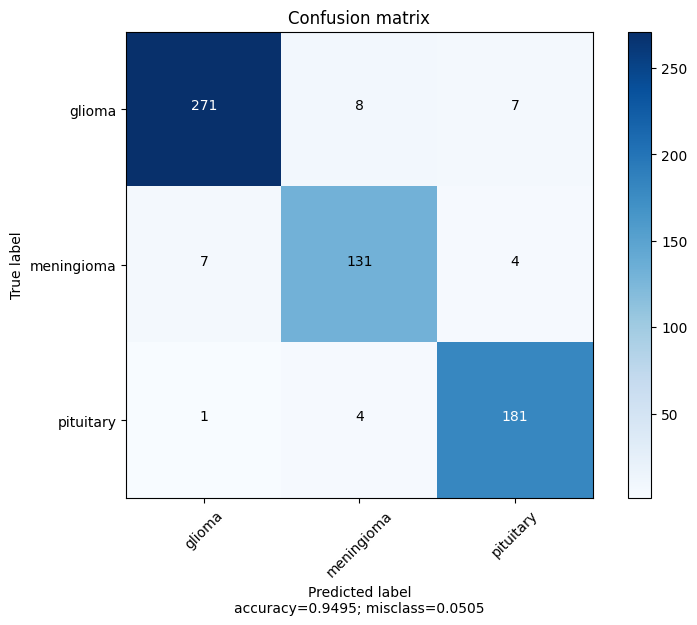

In [15]:
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
loss,acc = model.evaluate(x_test,y_test,verbose = 1)
draw_matrix(labels, y_test_new, pred, acc)

In [16]:
%reset -f

100%|██████████| 186/186 [00:00<00:00, 194.83it/s]


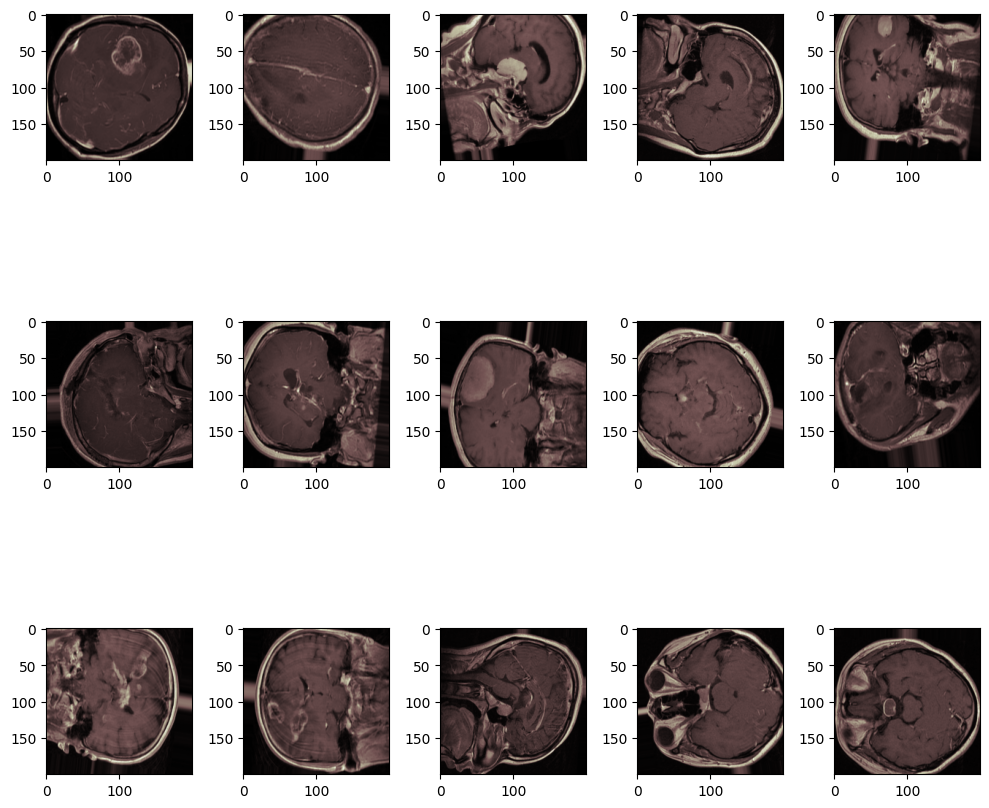

(614, 200, 200, 3)
(10536, 200, 200, 3)
(614, 3)
(10536, 3)
Epoch 1/50
263/264 [============================>.] - ETA: 0s - loss: 0.9002 - accuracy: 0.6115
Epoch 1: saving model to model-EfficientNetB0.h5
Epoch 1: 29.10 seconds
264/264 [==============================] - 29s 91ms/step - loss: 0.8994 - accuracy: 0.6120 - val_loss: 5.8973 - val_accuracy: 0.3321 - lr: 0.0010
Epoch 2/50
263/264 [============================>.] - ETA: 0s - loss: 0.5065 - accuracy: 0.8029
Epoch 2: saving model to model-EfficientNetB0.h5
Epoch 2: 22.80 seconds
264/264 [==============================] - 23s 86ms/step - loss: 0.5071 - accuracy: 0.8027 - val_loss: 9.2003 - val_accuracy: 0.3321 - lr: 0.0010
Epoch 3/50
264/264 [==============================] - ETA: 0s - loss: 0.3485 - accuracy: 0.8661
Epoch 3: saving model to model-EfficientNetB0.h5
Epoch 3: 22.97 seconds
264/264 [==============================] - 23s 87ms/step - loss: 0.3485 - accuracy: 0.8661 - val_loss: 7.8396 - val_accuracy: 0.3454 - lr: 0.001

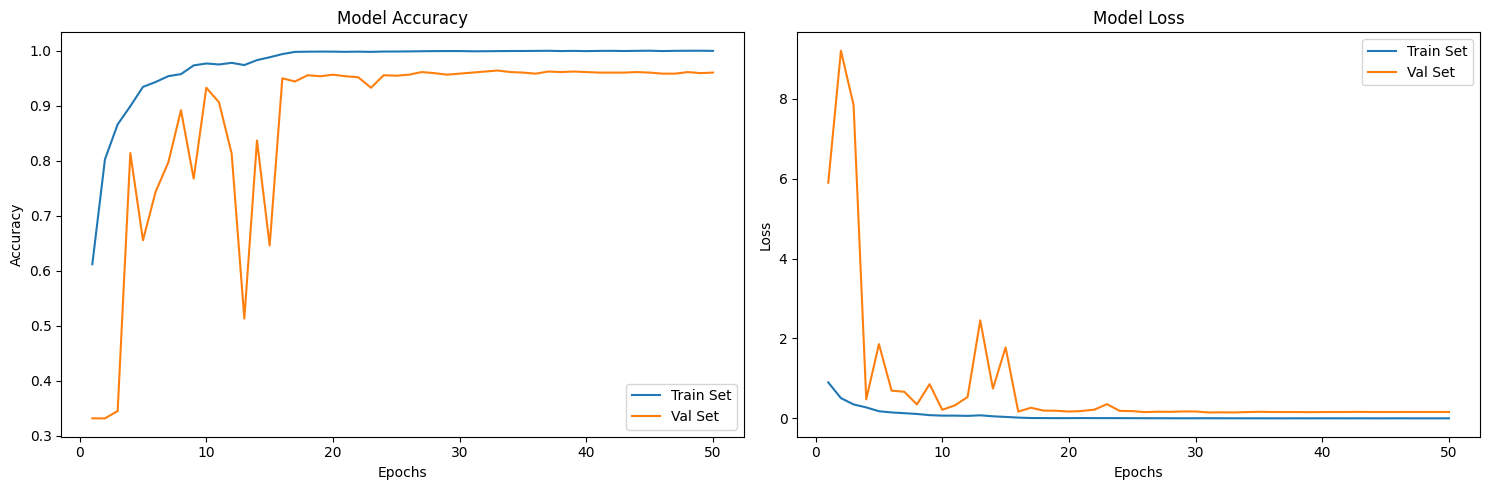

20/20 [==============================] - 0s 14ms/step - loss: 0.1767 - accuracy: 0.9658
Test Accuracy:  96.58
              precision    recall  f1-score   support

      glioma     0.9822    0.9650    0.9735       286
  meningioma     0.9371    0.9437    0.9404       142
   pituitary     0.9632    0.9839    0.9734       186

    accuracy                         0.9658       614
   macro avg     0.9608    0.9642    0.9624       614
weighted avg     0.9660    0.9658    0.9658       614



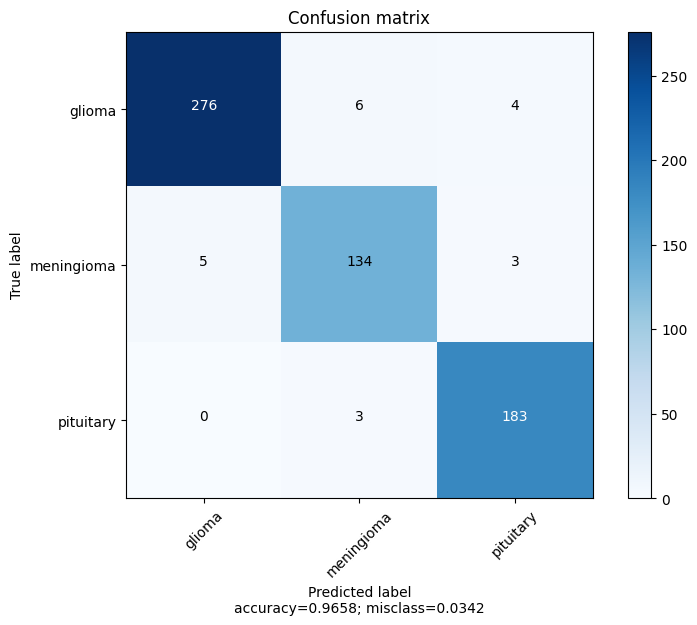

In [19]:
labels = ['glioma', 'meningioma', 'pituitary']
data_path = '/root/autodl-tmp/dataset/figshare_MBTD/augmented'
image_size = 200
x_train, x_test, y_train, y_test = load_data(data_path, labels, image_size)


net = EfficientNetB0(weights=None, include_top=False, input_shape=(image_size, image_size, 3), classes=3)
model = net.output
model = GlobalAveragePooling2D()(model)
model = Dropout(0.5)(model)
model = Dense(3, activation="softmax")(model)
model = Model(inputs=net.input, outputs=model)
adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])


tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint(filepath='model-EfficientNetB0.h5',
                             monitor='val_accuracy', verbose=1, save_best_only=False, mode='max')
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)
time_callback = TimeHistory()
history = model.fit(x_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=36,
                   callbacks=[tensorboard,checkpoint,reduce_lr, time_callback])


draw_curve(history)
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
loss,acc = model.evaluate(x_test,y_test,verbose = 1)
draw_matrix(labels, y_test_new, pred, acc)
%reset -f


100%|██████████| 186/186 [00:00<00:00, 194.98it/s]


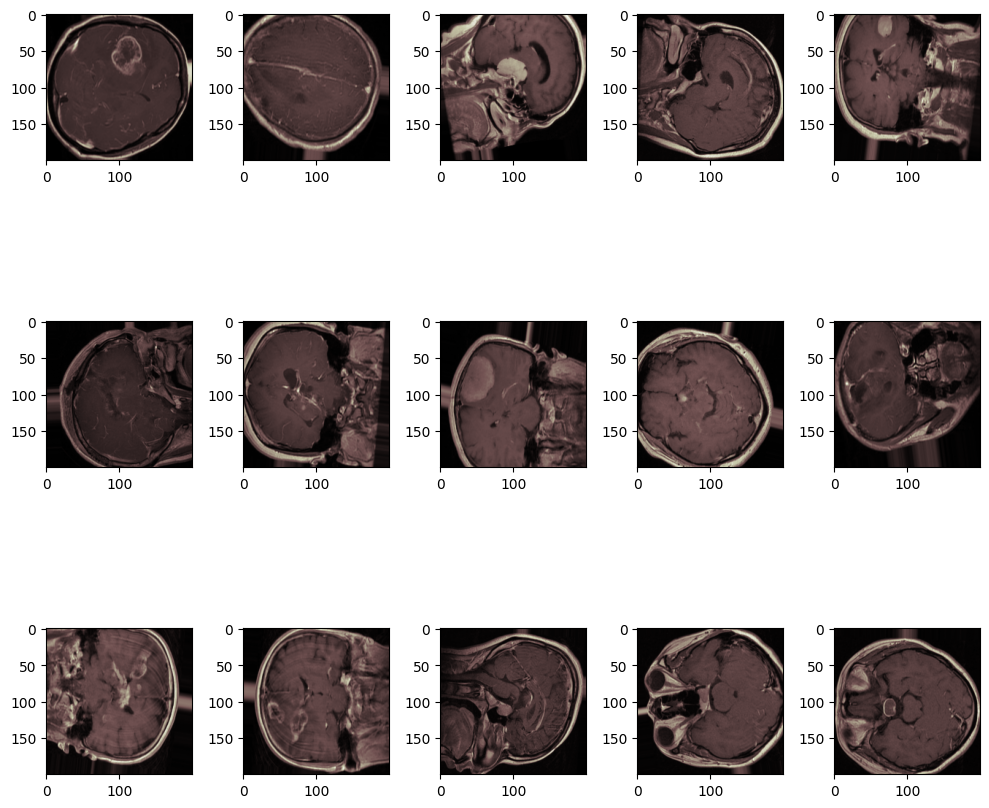

(614, 200, 200, 3)
(10536, 200, 200, 3)
(614, 3)
(10536, 3)
Epoch 1/50
264/264 [==============================] - ETA: 0s - loss: 0.8804 - accuracy: 0.6219
Epoch 1: saving model to model-EfficientNetB0.h5
Epoch 1: 29.49 seconds
264/264 [==============================] - 29s 93ms/step - loss: 0.8804 - accuracy: 0.6219 - val_loss: 5.0727 - val_accuracy: 0.3321 - lr: 0.0010
Epoch 2/50
263/264 [============================>.] - ETA: 0s - loss: 0.5174 - accuracy: 0.7966
Epoch 2: saving model to model-EfficientNetB0.h5
Epoch 2: 23.54 seconds
264/264 [==============================] - 24s 89ms/step - loss: 0.5172 - accuracy: 0.7967 - val_loss: 11.9343 - val_accuracy: 0.3321 - lr: 0.0010
Epoch 3/50
263/264 [============================>.] - ETA: 0s - loss: 0.3457 - accuracy: 0.8638
Epoch 3: saving model to model-EfficientNetB0.h5
Epoch 3: 23.14 seconds
264/264 [==============================] - 23s 88ms/step - loss: 0.3459 - accuracy: 0.8636 - val_loss: 5.2765 - val_accuracy: 0.3406 - lr: 0.00

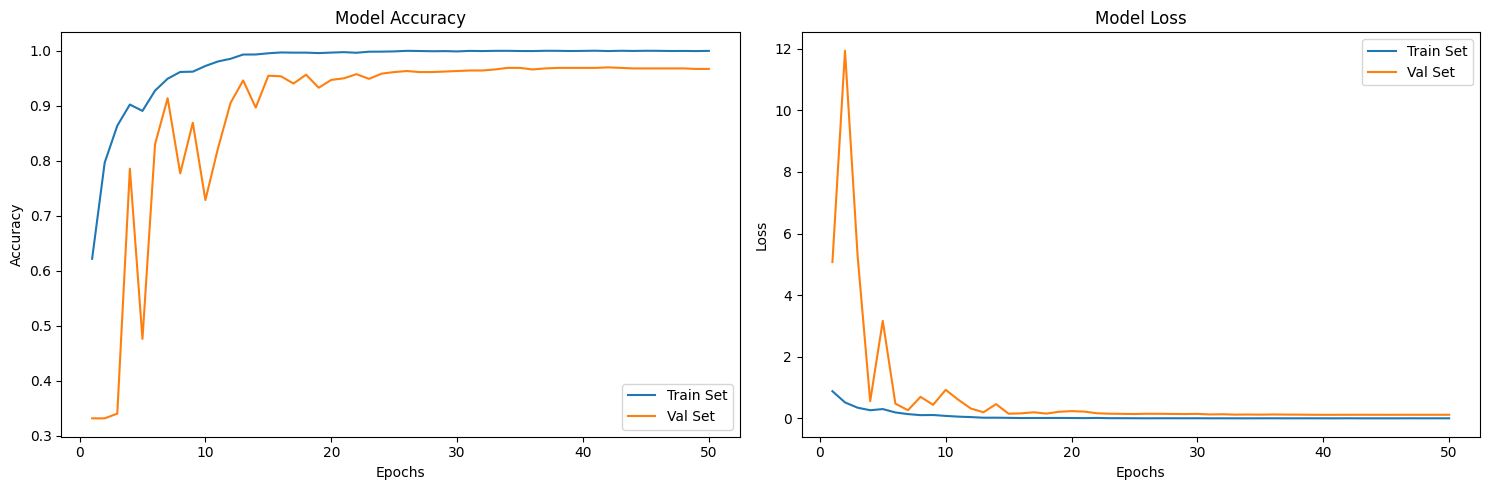

20/20 [==============================] - 0s 13ms/step - loss: 0.1338 - accuracy: 0.9658
Test Accuracy:  96.58
              precision    recall  f1-score   support

      glioma     0.9821    0.9615    0.9717       286
  meningioma     0.9306    0.9437    0.9371       142
   pituitary     0.9684    0.9892    0.9787       186

    accuracy                         0.9658       614
   macro avg     0.9604    0.9648    0.9625       614
weighted avg     0.9661    0.9658    0.9658       614



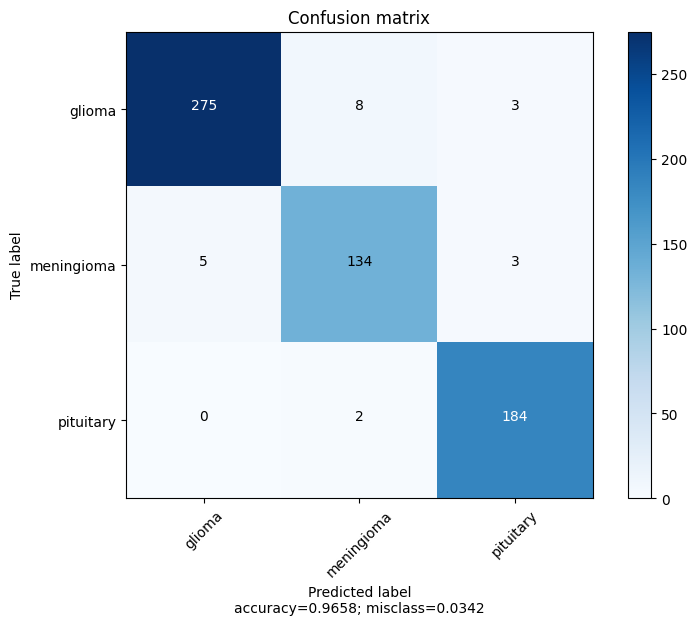

In [21]:
labels = ['glioma', 'meningioma', 'pituitary']
data_path = '/root/autodl-tmp/dataset/figshare_MBTD/augmented'
image_size = 200
x_train, x_test, y_train, y_test = load_data(data_path, labels, image_size)


net = EfficientNetB0(weights=None, include_top=False, input_shape=(image_size, image_size, 3), classes=3)
model = net.output
model = GlobalAveragePooling2D()(model)
model = Dropout(0.5)(model)
model = Dense(3, activation="softmax")(model)
model = Model(inputs=net.input, outputs=model)
adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])


tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint(filepath='model-EfficientNetB0.h5',
                             monitor='val_accuracy', verbose=1, save_best_only=False, mode='max')
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)
time_callback = TimeHistory()
history = model.fit(x_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=36,
                   callbacks=[tensorboard,checkpoint,reduce_lr, time_callback])


draw_curve(history)
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
loss,acc = model.evaluate(x_test,y_test,verbose = 1)
draw_matrix(labels, y_test_new, pred, acc)
%reset -f

100%|██████████| 186/186 [00:00<00:00, 193.85it/s]


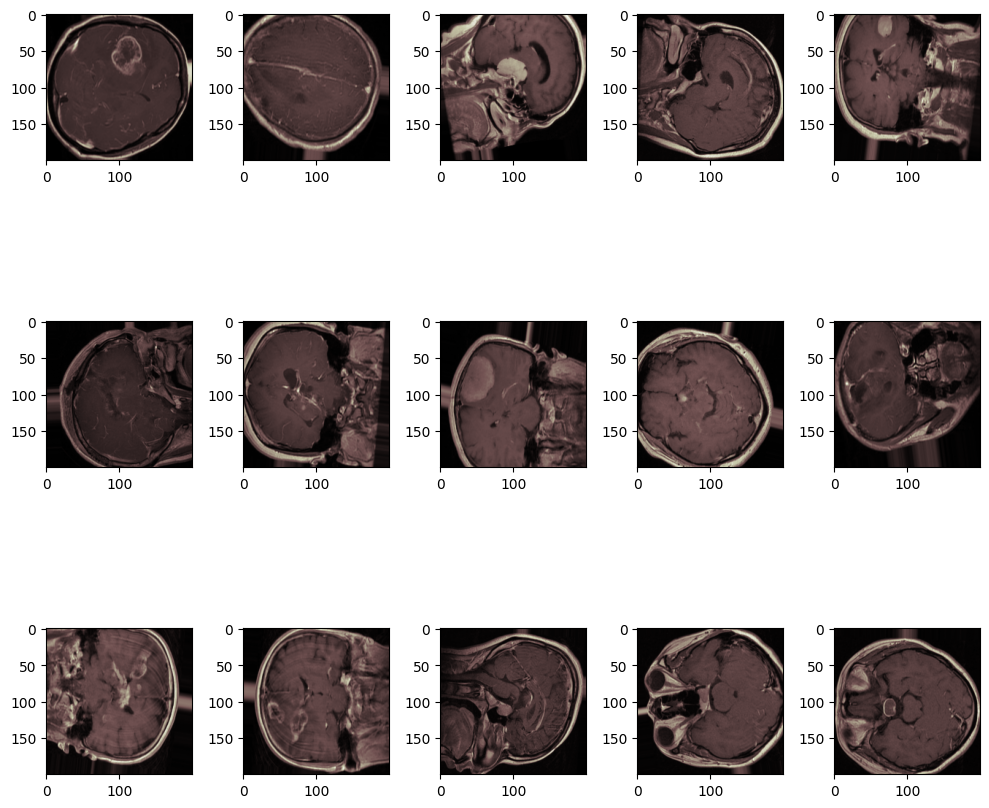

(614, 200, 200, 3)
(10536, 200, 200, 3)
(614, 3)
(10536, 3)
Epoch 1/50
263/264 [============================>.] - ETA: 0s - loss: 0.8855 - accuracy: 0.6193
Epoch 1: saving model to model-EfficientNetB0.h5
Epoch 1: 28.60 seconds
264/264 [==============================] - 29s 89ms/step - loss: 0.8849 - accuracy: 0.6196 - val_loss: 2.2298 - val_accuracy: 0.3321 - lr: 0.0010
Epoch 2/50
263/264 [============================>.] - ETA: 0s - loss: 0.5241 - accuracy: 0.7968
Epoch 2: saving model to model-EfficientNetB0.h5
Epoch 2: 22.67 seconds
264/264 [==============================] - 23s 86ms/step - loss: 0.5240 - accuracy: 0.7969 - val_loss: 14.3825 - val_accuracy: 0.3321 - lr: 0.0010
Epoch 3/50
263/264 [============================>.] - ETA: 0s - loss: 0.3763 - accuracy: 0.8563
Epoch 3: saving model to model-EfficientNetB0.h5
Epoch 3: 22.41 seconds
264/264 [==============================] - 22s 85ms/step - loss: 0.3762 - accuracy: 0.8564 - val_loss: 1.2477 - val_accuracy: 0.6072 - lr: 0.00

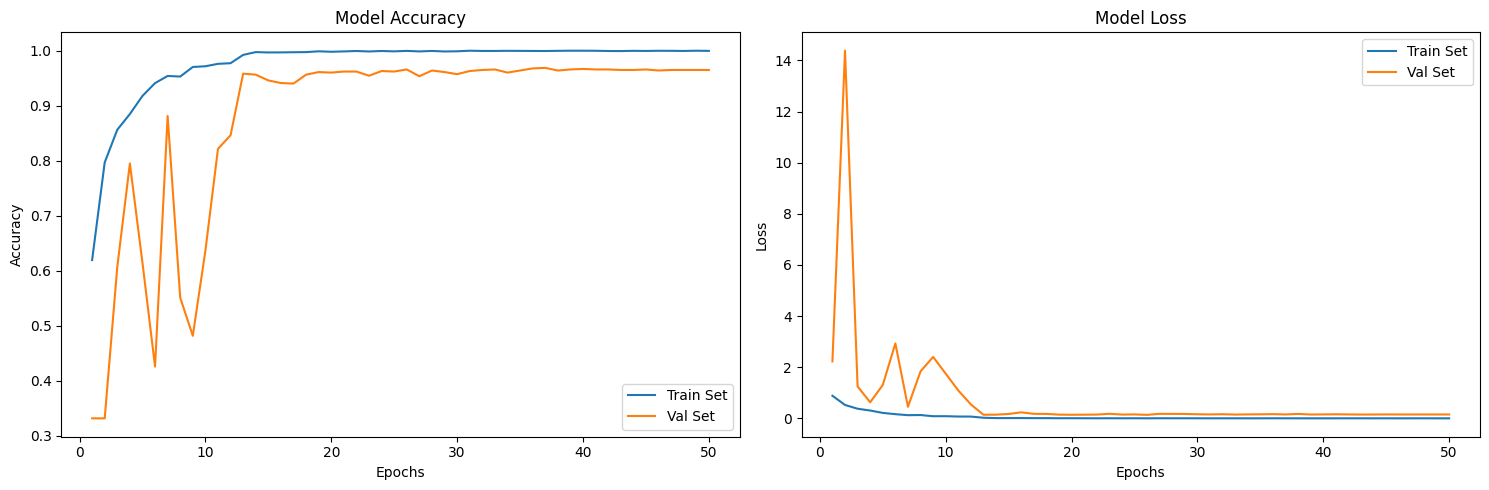

20/20 [==============================] - 0s 13ms/step - loss: 0.1708 - accuracy: 0.9609
Test Accuracy:  96.09
              precision    recall  f1-score   support

      glioma     0.9685    0.9685    0.9685       286
  meningioma     0.9416    0.9085    0.9247       142
   pituitary     0.9634    0.9892    0.9761       186

    accuracy                         0.9609       614
   macro avg     0.9578    0.9554    0.9565       614
weighted avg     0.9607    0.9609    0.9607       614



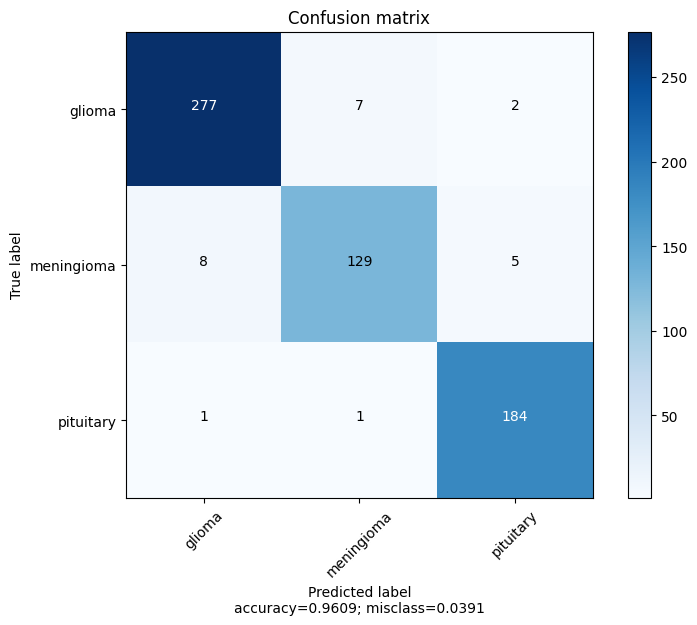

In [23]:
labels = ['glioma', 'meningioma', 'pituitary']
data_path = '/root/autodl-tmp/dataset/figshare_MBTD/augmented'
image_size = 200
x_train, x_test, y_train, y_test = load_data(data_path, labels, image_size)


net = EfficientNetB0(weights=None, include_top=False, input_shape=(image_size, image_size, 3), classes=3)
model = net.output
model = GlobalAveragePooling2D()(model)
model = Dropout(0.5)(model)
model = Dense(3, activation="softmax")(model)
model = Model(inputs=net.input, outputs=model)
adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])


tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint(filepath='model-EfficientNetB0.h5',
                             monitor='val_accuracy', verbose=1, save_best_only=False, mode='max')
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)
time_callback = TimeHistory()
history = model.fit(x_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=36,
                   callbacks=[tensorboard,checkpoint,reduce_lr, time_callback])


draw_curve(history)
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
loss,acc = model.evaluate(x_test,y_test,verbose = 1)
draw_matrix(labels, y_test_new, pred, acc)
%reset -f

100%|██████████| 186/186 [00:00<00:00, 194.08it/s]


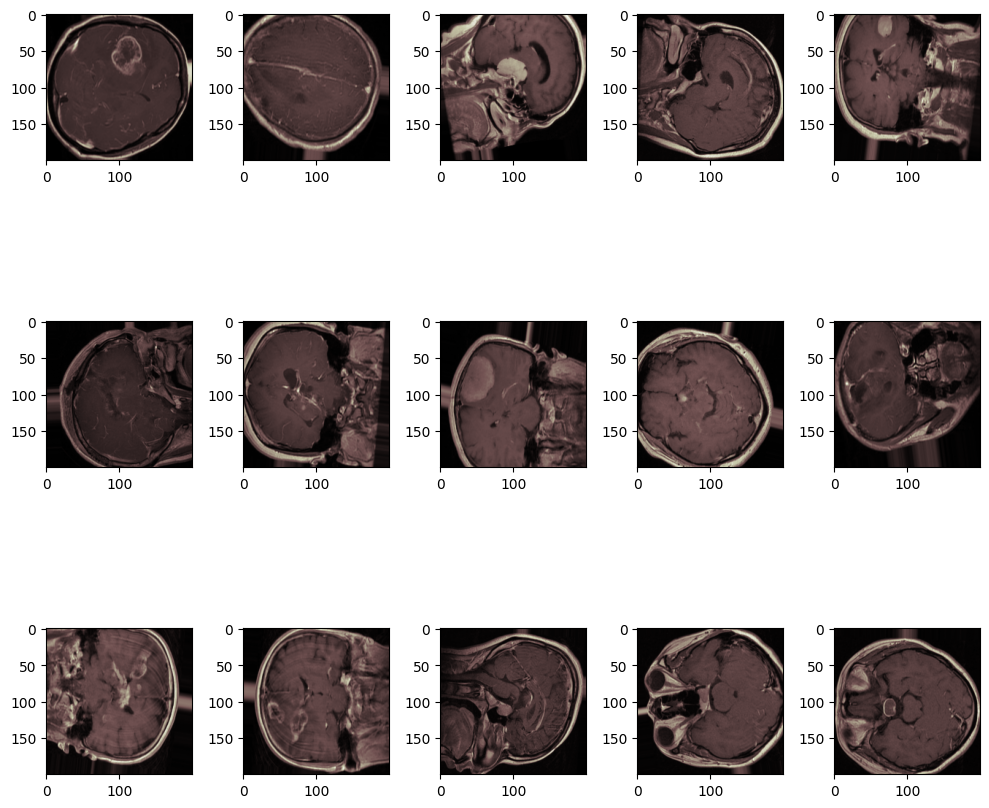

(614, 200, 200, 3)
(10536, 200, 200, 3)
(614, 3)
(10536, 3)
Epoch 1/50
263/264 [============================>.] - ETA: 0s - loss: 0.8784 - accuracy: 0.6261
Epoch 1: saving model to model-EfficientNetB0.h5
Epoch 1: 29.34 seconds
264/264 [==============================] - 29s 92ms/step - loss: 0.8777 - accuracy: 0.6263 - val_loss: 6.2887 - val_accuracy: 0.3321 - lr: 0.0010
Epoch 2/50
263/264 [============================>.] - ETA: 0s - loss: 0.5201 - accuracy: 0.7949
Epoch 2: saving model to model-EfficientNetB0.h5
Epoch 2: 23.13 seconds
264/264 [==============================] - 23s 88ms/step - loss: 0.5204 - accuracy: 0.7949 - val_loss: 3.5593 - val_accuracy: 0.3321 - lr: 0.0010
Epoch 3/50
264/264 [==============================] - ETA: 0s - loss: 0.3731 - accuracy: 0.8540
Epoch 3: saving model to model-EfficientNetB0.h5
Epoch 3: 22.34 seconds
264/264 [==============================] - 22s 85ms/step - loss: 0.3731 - accuracy: 0.8540 - val_loss: 2.0195 - val_accuracy: 0.4706 - lr: 0.001

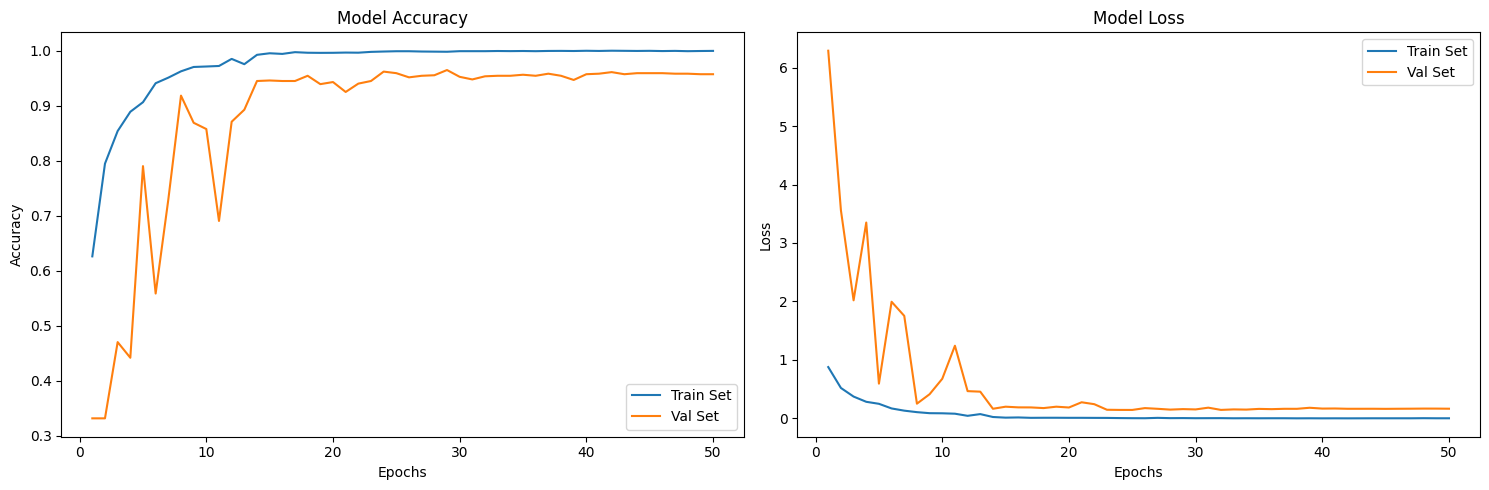

20/20 [==============================] - 0s 12ms/step - loss: 0.2045 - accuracy: 0.9511
Test Accuracy:  95.11
              precision    recall  f1-score   support

      glioma     0.9747    0.9441    0.9591       286
  meningioma     0.8980    0.9296    0.9135       142
   pituitary     0.9579    0.9785    0.9681       186

    accuracy                         0.9511       614
   macro avg     0.9435    0.9507    0.9469       614
weighted avg     0.9519    0.9511    0.9513       614



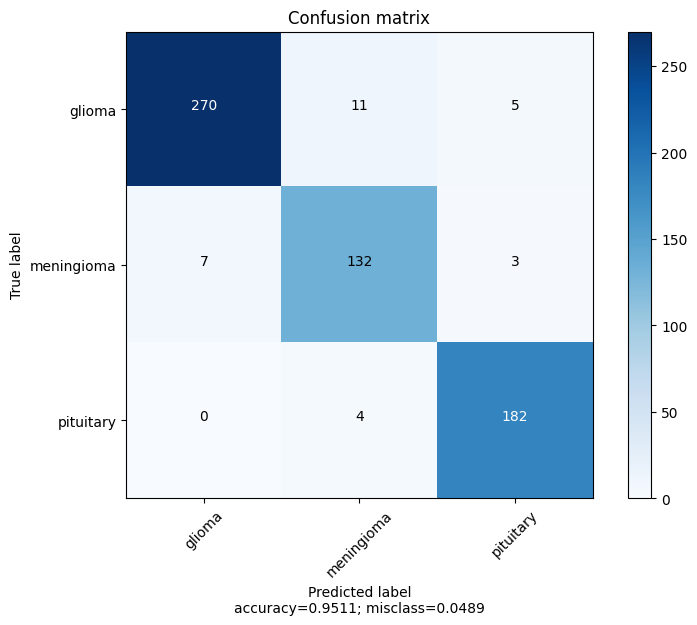

In [25]:
labels = ['glioma', 'meningioma', 'pituitary']
data_path = '/root/autodl-tmp/dataset/figshare_MBTD/augmented'
image_size = 200
x_train, x_test, y_train, y_test = load_data(data_path, labels, image_size)


net = EfficientNetB0(weights=None, include_top=False, input_shape=(image_size, image_size, 3), classes=3)
model = net.output
model = GlobalAveragePooling2D()(model)
model = Dropout(0.5)(model)
model = Dense(3, activation="softmax")(model)
model = Model(inputs=net.input, outputs=model)
adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])


tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint(filepath='model-EfficientNetB0.h5',
                             monitor='val_accuracy', verbose=1, save_best_only=False, mode='max')
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)
time_callback = TimeHistory()
history = model.fit(x_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=36,
                   callbacks=[tensorboard,checkpoint,reduce_lr, time_callback])


draw_curve(history)
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
loss,acc = model.evaluate(x_test,y_test,verbose = 1)
draw_matrix(labels, y_test_new, pred, acc)